In [4]:
import numpy as np 
import pickle, gzip, sklearn, sklearn.datasets, scipy,h5py
from PIL import Image
from scipy import ndimage

%matplotlib inline

In [10]:
def load_data():
    f=gzip.open('mnist.pkl.gz', 'rb')
    f.seek(0)
    training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
    f.close()
    return (training_data, validation_data, test_data)

In [11]:
training_data, validation_data, test_data = load_data()

In [13]:
training_data

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([5, 0, 4, ..., 8, 4, 8], dtype=int64))

In [14]:
# shape of data
print(training_data[0].shape) #feature dataset
print(training_data[1].shape) #target dataset


(50000, 784)
(50000,)


In [17]:
def one_hot(j):
    n=j.shape[0]
    new_array = np.zeros((10,n))
    index = 0
    for res in j:
        new_array[res][index] = 1.0
        index =+ 1
    return new_array

In [21]:
data = np.array([0,1,2,3,4,5,6,7,8,9])
print(data.shape[0])
one_hot(data)

10


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [22]:
def data_wrapper():
    tr_d, va_d, te_d = load_data()
    
    training_inputs = np.array(tr_d[0][:]).T
    training_results = np.array(tr_d[1][:])
    train_set_y = one_hot(training_results)
    
    validation_inputs = np.array(va_d[0][:]).T
    validation_results = np.array(va_d[1][:])
    validation_set_y = one_hot(validation_results)
    
    test_inputs = np.array(te_d[0][:]).T
    test_results = np.array(te_d[1][:])
    test_set_y = one_hot(test_results)
    
    return (training_inputs, train_set_y, test_inputs, test_set_y)

In [23]:
train_set_x, train_set_y, test_set_x, test_set_y = data_wrapper()

In [24]:
print ("train_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x shape: (784, 50000)
train_set_y shape: (10, 50000)
test_set_x shape: (784, 10000)
test_set_y shape: (10, 10000)


In [27]:
import pandas as pd
y = pd.DataFrame(train_set_y)
print("The target dataset is:" + str(training_data[1]))
print("The one hot encoding dataset is:")
y

The target dataset is:[5 0 4 ... 8 4 8]
The one hot encoding dataset is:


,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


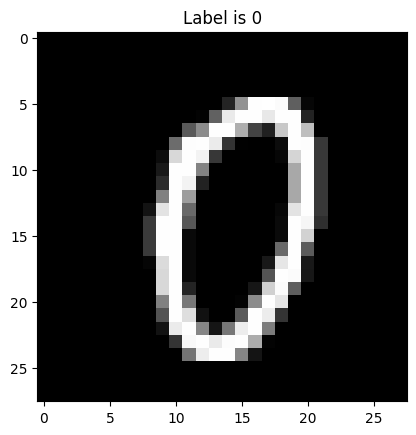

In [29]:
import matplotlib.pyplot as plt
index  = 1000
k = train_set_x[:,index]
k = k.reshape((28, 28))
plt.title('Label is {label}'.format(label= training_data[1][index]))
plt.imshow(k, cmap='gray')

### Activation function

In [31]:
#Sigmoid

def sigmoid(Z):
    H = 1/(1+np.exp(-Z))
    sigmoid_memory = Z
    return H, sigmoid_memory

Z = np.arange(8).reshape(4,2)
print("sigmoid(Z)=" + str(sigmoid(Z)))

sigmoid(Z)=(array([[0.5       , 0.73105858],
       [0.88079708, 0.95257413],
       [0.98201379, 0.99330715],
       [0.99752738, 0.99908895]]), array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]]))


In [33]:
# relu

def relu(z):

    H = np.maximum(0,Z)

    assert(H.shape == Z.shape)
    relu_memory = Z
    return H, relu_memory

Z= np.array([1,3,-1,-4,-5,7,9,18]).reshape(4,2)
print("relu(Z)= " + str(relu(Z)))

relu(Z)= (array([[ 1,  3],
       [ 0,  0],
       [ 0,  7],
       [ 9, 18]]), array([[ 1,  3],
       [-1, -4],
       [-5,  7],
       [ 9, 18]]))


In [34]:
#softmax - activation of the last layer

def softmax(Z):
    Z_exp = np.exp(Z)
    Z_sum = np.sum(Z_exp, axis = 0, keepdims= True)

    H = Z_exp/Z_sum #normalising step
    softmax_memory = Z
    return H, softmax_memory

Z= np.array([[11,19,10], [12,21,23]])
H, softmax_memory = softmax(Z)
print(H)
print(softmax_memory)

[[2.68941421e-01 1.19202922e-01 2.26032430e-06]
 [7.31058579e-01 8.80797078e-01 9.99997740e-01]]
[[11 19 10]
 [12 21 23]]
